In [59]:
import pyaudio
import scipy.signal as signal
import scipy.fft as fft
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.io.wavfile import read
from IPython.display import clear_output

%matplotlib notebook

In [7]:
# fixed chunk size
CHUNK = 1024 * 2
sampleRate = 44100

#initialize pyaudio
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16, channels=1, rate=sampleRate, input=True, frames_per_buffer=CHUNK)

In [52]:
#data filter
fs = sampleRate
numtaps = 50
filt = signal.firwin(numtaps, [200,3000], pass_zero = False, fs = fs)

<IPython.core.display.Javascript object>


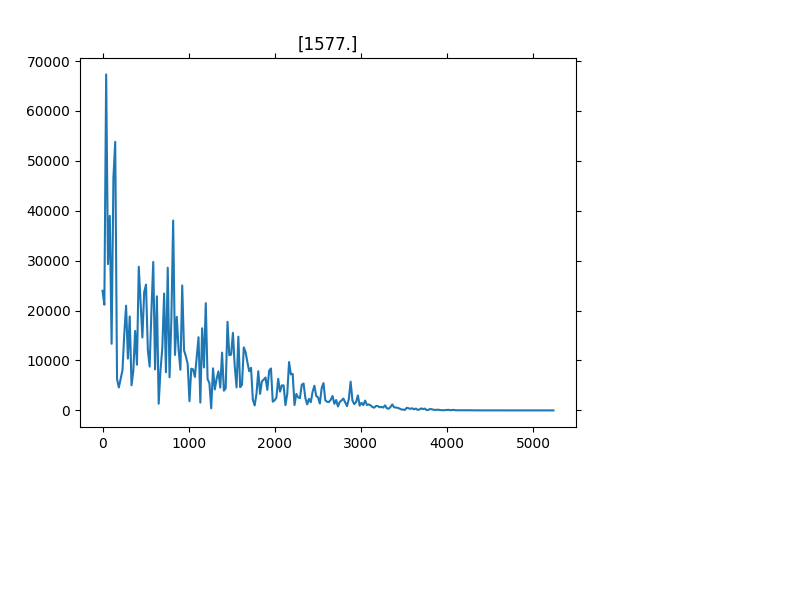

In [ ]:
#audio spectrum display
hist = []

#live plotting setup
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

#frequency monitor
temp = 0

while(True):
    #data stream and filter
    data = stream.read(CHUNK)
    data = np.frombuffer(data, dtype=np.int16)
    data = np.convolve(data,filt)
    
    #compute fft
    freq = fft.fft(data)
    freqs = fft.fftfreq(len(freq)) * sampleRate
    freq = freq[0:250]
    freqs = freqs[0:250]
    freq = np.abs(freq)
    
    #find prominent frequency
    peaks, _ = signal.find_peaks(freq, prominence = 1e6)
    if (len(peaks) != 0):
        val = np.round(freqs[peaks])
    
    #live plotting
    ax.clear()
    ax.plot(freqs, freq)
    ax.title.set_text(str(val))
    fig.canvas.draw()

# close stream
stream.stop_stream()
stream.close()
p.terminate()